Esta é a abordagem mais direta. Vamos simular 100.000 "futuros" possíveis para a economia do país. Em cada uma dessas simulações (cada "futuro"), vamos:

Gerar 10 taxas de crescimento anuais para o PIB.

Gerar 10 valores anuais para exportações e importações.

Calcular o PIB final após 10 anos de crescimento composto.

Calcular a balança de pagamentos de cada ano e somá-las.

A vantagem do Monte Carlo aqui é sua capacidade de modelar a natureza estocástica (aleatória e sequencial) do crescimento do PIB de forma muito eficiente.

In [ ]:
import numpy as np

# --- Constantes do Exercício 3 ---
N_SIMULACOES_E3 = 100000
N_ANOS = 10
PIB_INICIAL = 2000  # Em bilhões de USD

# Parâmetros das distribuições
MEDIA_CRESCIMENTO = 0.03
DP_CRESCIMENTO = 0.01

# Constantes do Exercício 2 (redefinidas para robustez)
MEDIA_EXP = 100
DP_EXP = 10
MEDIA_IMP = 90
DP_IMP = 15

# --- Simulação Monte Carlo ---
# 1. Gerar todas as variáveis aleatórias
taxas_crescimento_anual = np.random.normal(loc=MEDIA_CRESCIMENTO, scale=DP_CRESCIMENTO, size=(N_SIMULACOES_E3, N_ANOS))
exportacoes_anual = np.random.normal(loc=MEDIA_EXP, scale=DP_EXP, size=(N_SIMULACOES_E3, N_ANOS))
importacoes_anual = np.random.normal(loc=MEDIA_IMP, scale=DP_IMP, size=(N_SIMULACOES_E3, N_ANOS))

# 2. Calcular o PIB após 10 anos
fatores_crescimento = 1 + taxas_crescimento_anual
pib_trajetorias = np.cumprod(fatores_crescimento, axis=1) * PIB_INICIAL
pib_final_mc = pib_trajetorias[:, -1]

# 3. Calcular a Balança de Pagamentos Acumulada
balanca_anual = exportacoes_anual - importacoes_anual
balanca_acumulada_mc = np.sum(balanca_anual, axis=1)

# 4. Calcular estatísticas dos resultados finais
media_pib_mc = np.mean(pib_final_mc)
dp_pib_mc = np.std(pib_final_mc)
media_balanca_mc_acumulada = np.mean(balanca_acumulada_mc)
dp_balanca_mc_acumulada = np.std(balanca_acumulada_mc)

print("--- Resultados de Longo Prazo com Monte Carlo ---")
print(f"PIB médio após 10 anos: ${media_pib_mc:.2f} bilhões")
print(f"Desvio Padrão do PIB após 10 anos: ${dp_pib_mc:.2f} bilhões")
print(f"Balança Acumulada média em 10 anos: ${media_balanca_mc_acumulada:.2f} bilhões")
print(f"Desvio Padrão da Balança Acumulada: ${dp_balanca_mc_acumulada:.2f} bilhões")

--- Resultados de Longo Prazo com Monte Carlo ---
PIB médio após 10 anos: $2687.67 bilhões
Desvio Padrão do PIB após 10 anos: $82.56 bilhões
Balança Acumulada média em 10 anos: $99.95 bilhões
Desvio Padrão da Balança Acumulada: $57.01 bilhões


Aqui, a abordagem "Brute Force" foi descrita como particionar o período, resolver cada parte e recombinar. Faremos isso da seguinte forma:

Discretizar: Vamos criar um número menor de cenários (ex: 5 cenários) para cada variável aleatória (crescimento, exportação, importação) usando percentis.

Parte 1 (Anos 1-5): Calculamos os resultados para os primeiros 5 anos para cada cenário discreto.

Parte 2 (Anos 6-10) e Recombinação: Para cada resultado da Parte 1, aplicamos novamente todos os cenários discretos para os 5 anos seguintes. Isso cria uma árvore de possibilidades que cresce de forma combinatória.

Essa abordagem é determinística (dado o mesmo conjunto de cenários, o resultado é sempre o mesmo) e explora sistematicamente as combinações dos cenários definidos.

In [ ]:
import numpy as np
from scipy.stats import norm

# 1. Discretizar: Usar 5 cenários baseados em percentis para cada variável
percentis = [0.10, 0.30, 0.50, 0.70, 0.90]
cenarios_crescimento = norm.ppf(percentis, loc=MEDIA_CRESCIMENTO, scale=DP_CRESCIMENTO)
cenarios_exp = norm.ppf(percentis, loc=MEDIA_EXP, scale=DP_EXP)
cenarios_imp = norm.ppf(percentis, loc=MEDIA_IMP, scale=DP_IMP)

# --- Processamento do PIB ---
# Parte 1 (Anos 1-5)
pib_intermediarios = []
for taxa in cenarios_crescimento:
    pib_ano_5 = PIB_INICIAL * ((1 + taxa) ** 5)
    pib_intermediarios.append(pib_ano_5)

# Parte 2 (Anos 6-10) e Recombinação
pib_final_bf = []
for pib5 in pib_intermediarios:
    for taxa in cenarios_crescimento:
        pib_ano_10 = pib5 * ((1 + taxa) ** 5)
        pib_final_bf.append(pib_ano_10)

# --- Processamento da Balança de Pagamentos ---
# Parte 1 (Anos 1-5)
balanca_intermediaria_acumulada = []
for exp in cenarios_exp:
    for imp in cenarios_imp:
        balanca_5_anos = (exp - imp) * 5
        balanca_intermediaria_acumulada.append(balanca_5_anos)

# Parte 2 (Anos 6-10) e Recombinação
balanca_final_bf_acumulada = []
segunda_metade_bop = balanca_intermediaria_acumulada.copy()
for bop1 in balanca_intermediaria_acumulada:
    for bop2 in segunda_metade_bop:
        balanca_10_anos = bop1 + bop2
        balanca_final_bf_acumulada.append(balanca_10_anos)

# --- Resultados Finais do "Brute Force" ---
media_pib_bf = np.mean(pib_final_bf)
dp_pib_bf = np.std(pib_final_bf)
media_balanca_bf = np.mean(balanca_final_bf_acumulada)
dp_balanca_bf = np.std(balanca_final_bf_acumulada)

print("\n--- Resultados de Longo Prazo com 'Brute Force' ---")
print(f"PIB médio após 10 anos: ${media_pib_bf:.2f} bilhões ({len(pib_final_bf)} cenários)")
print(f"Desvio Padrão do PIB após 10 anos: ${dp_pib_bf:.2f} bilhões")
print(f"Balança Acumulada média em 10 anos: ${media_balanca_bf:.2f} bilhões ({len(balanca_final_bf_acumulada)} cenários)")
print(f"Desvio Padrão da Balança Acumulada: ${dp_balanca_bf:.2f} bilhões")


--- Resultados de Longo Prazo com 'Brute Force' ---
PIB médio após 10 anos: $2691.72 bilhões (25 cenários)
Desvio Padrão do PIB após 10 anos: $161.85 bilhões
Balança Acumulada média em 10 anos: $100.00 bilhões (625 cenários)
Desvio Padrão da Balança Acumulada: $111.64 bilhões


Agora, vamos visualizar e comparar os resultados. Primeiro, um gráfico de linhas mostrando algumas trajetórias individuais do PIB na simulação de Monte Carlo para dar uma ideia da variabilidade. Depois, histogramas para comparar as distribuições finais de ambos os métodos.

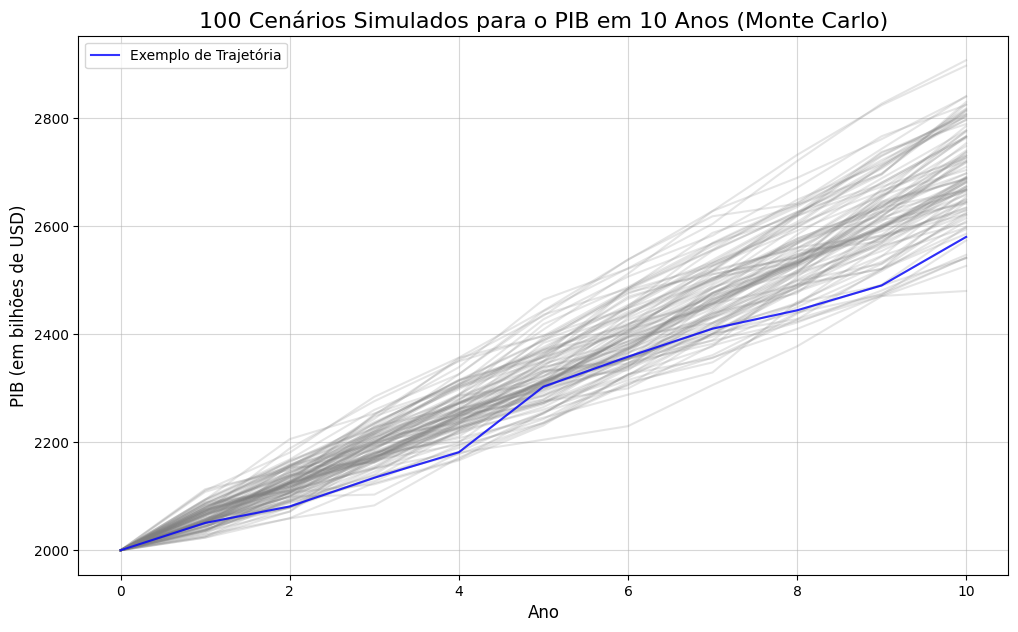

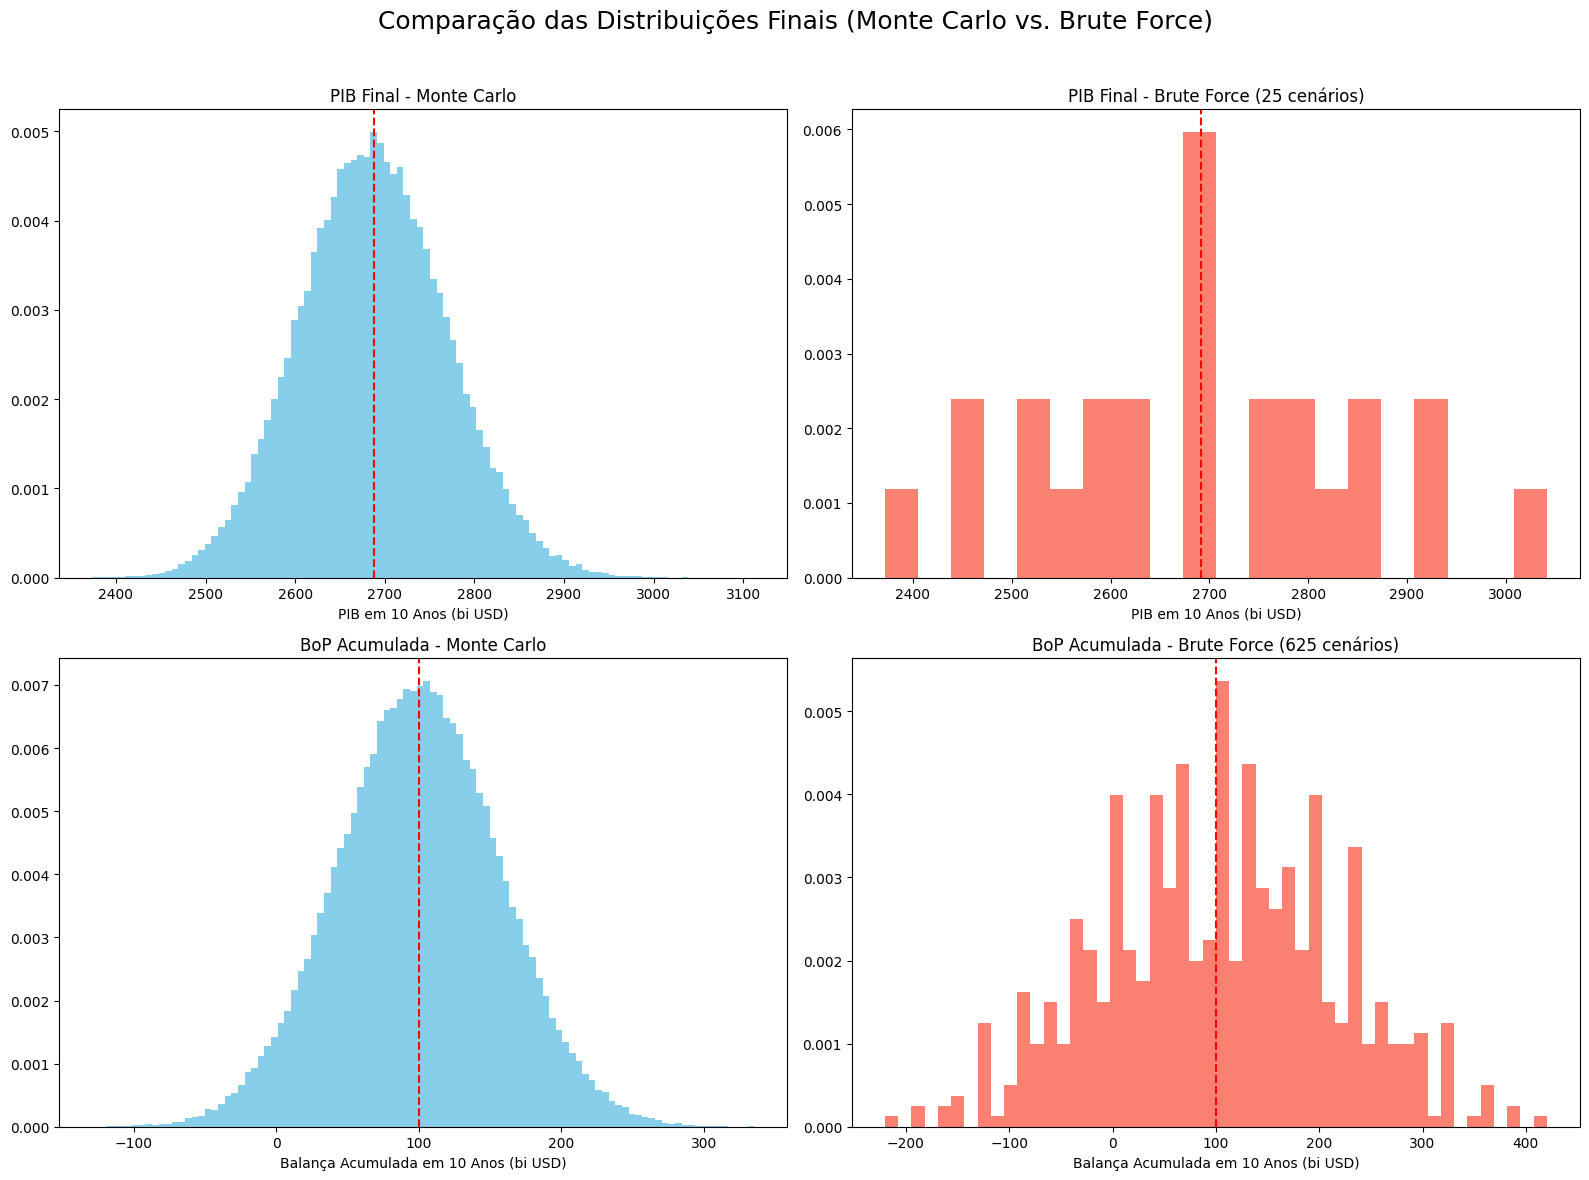


====================================== COMPARAÇÃO NUMÉRICA (EXERCÍCIO 3) =======================================

------------------------------------------------- PIB FINAL (10 ANOS) --------------------------------------------------
| Método        | Cenários   | Média Estimada (bi USD)  | Desvio Padrão (bi USD) | Variância              |
|---------------|------------|--------------------------|------------------------|------------------------|
| Monte Carlo   | 100.000    | 2687.67                  | 82.56                  | 6815.58                |
| Brute Force   | 25         | 2691.72                  | 161.85                 | 26195.93               |

----------------------------------------- BALANÇA ACUMULADA (10 ANOS) --------------------------------------------
| Método        | Cenários   | Média Estimada (bi USD)  | Desvio Padrão (bi USD) | Variância              |
|---------------|------------|--------------------------|------------------------|------------------------|


In [ ]:
# --- Importações para esta célula ---
import matplotlib.pyplot as plt
import numpy as np

# 1. Gráfico de Linhas (Trajetórias do PIB no Monte Carlo)
plt.figure(figsize=(12, 7))
num_trajetorias_plot = 100
anos = np.arange(1, N_ANOS + 1)
pib_plot = np.insert(pib_trajetorias[:num_trajetorias_plot, :], 0, PIB_INICIAL, axis=1)
anos_plot = np.insert(anos, 0, 0)

plt.plot(anos_plot, pib_plot.T, color='gray', alpha=0.2)
plt.plot(anos_plot, pib_plot[0], color='blue', alpha=0.8, label='Exemplo de Trajetória')
plt.title(f'{num_trajetorias_plot} Cenários Simulados para o PIB em 10 Anos (Monte Carlo)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB (em bilhões de USD)', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

# 2. Histogramas Comparativos das Distribuições Finais
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparação das Distribuições Finais (Monte Carlo vs. Brute Force)', fontsize=18)

# Comparação do PIB Final
axes[0, 0].hist(pib_final_mc, bins=100, density=True, color='skyblue', label='Monte Carlo')
axes[0, 0].set_title('PIB Final - Monte Carlo')
axes[0, 0].set_xlabel('PIB em 10 Anos (bi USD)')
axes[0, 0].axvline(media_pib_mc, color='red', linestyle='--')

axes[0, 1].hist(pib_final_bf, bins=20, density=True, color='salmon', label='Brute Force')
axes[0, 1].set_title(f'PIB Final - Brute Force ({len(pib_final_bf)} cenários)')
axes[0, 1].set_xlabel('PIB em 10 Anos (bi USD)')
axes[0, 1].axvline(media_pib_bf, color='red', linestyle='--')

# Comparação da Balança Acumulada
axes[1, 0].hist(balanca_acumulada_mc, bins=100, density=True, color='skyblue', label='Monte Carlo')
axes[1, 0].set_title('BoP Acumulada - Monte Carlo')
axes[1, 0].set_xlabel('Balança Acumulada em 10 Anos (bi USD)')
axes[1, 0].axvline(media_balanca_mc_acumulada, color='red', linestyle='--')

axes[1, 1].hist(balanca_final_bf_acumulada, bins=50, density=True, color='salmon', label='Brute Force')
axes[1, 1].set_title(f'BoP Acumulada - Brute Force ({len(balanca_final_bf_acumulada)} cenários)')
axes[1, 1].set_xlabel('Balança Acumulada em 10 Anos (bi USD)')
axes[1, 1].axvline(media_balanca_bf, color='red', linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Tabela Comparativa Final ---
print(r"""
====================================== COMPARAÇÃO NUMÉRICA (EXERCÍCIO 3) =======================================

------------------------------------------------- PIB FINAL (10 ANOS) --------------------------------------------------
| Método        | Cenários   | Média Estimada (bi USD)  | Desvio Padrão (bi USD) | Variância              |
|---------------|------------|--------------------------|------------------------|------------------------|
| Monte Carlo   | 100.000    | {0:<24.2f} | {1:<22.2f} | {2:<22.2f} |
| Brute Force   | {3:<10} | {4:<24.2f} | {5:<22.2f} | {6:<22.2f} |

----------------------------------------- BALANÇA ACUMULADA (10 ANOS) --------------------------------------------
| Método        | Cenários   | Média Estimada (bi USD)  | Desvio Padrão (bi USD) | Variância              |
|---------------|------------|--------------------------|------------------------|------------------------|
| Monte Carlo   | 100.000    | {7:<24.2f} | {8:<22.2f} | {9:<22.2f} |
| Brute Force   | {10:<10} | {11:<24.2f} | {12:<22.2f} | {13:<22.2f} |

CONCLUSÃO:
Ambos os métodos chegam a médias muito similares. No entanto, a distribuição do Monte Carlo é suave e mais
realista, capturando um espectro contínuo de resultados. O método "Brute Force", por usar um número
limitado de cenários, gera uma distribuição discreta e com menor variância, pois não captura os
eventos mais extremos que o Monte Carlo, com suas 100.000 simulações, consegue registrar.
""".format(
    media_pib_mc, dp_pib_mc, np.var(pib_final_mc), len(pib_final_bf), media_pib_bf, dp_pib_bf, np.var(pib_final_bf),
    media_balanca_mc_acumulada, dp_balanca_mc_acumulada, np.var(balanca_acumulada_mc), len(balanca_final_bf_acumulada), media_balanca_bf, dp_balanca_bf, np.var(balanca_final_bf_acumulada)
))